# Classification and Regression Trees (CARTs)

## What is Classification?

Before we talk about classification **algorithms**, it is worth taking a moment to talk about **classification**.

**Classification**: the act of assigning elements (individuals, events, observations, outcomes, images, etc.) to groups (success, failure, dog, human, female, etc.). In our case, we mean the act of assigning these elements to groups based on a statistical model.

There are many ways to classify observations. Traditionally, this had been done by individuals with domain expertise, but not necessarily any data to support the chosen method or decision. For example, many choices in sports have been made by managers or players based on intuition, tradition, or gut feeling. This might be an adequate initial attempt, but we hope that as evidence accumulates individuals or organizations leverage the data available to assess decision-making and ask if choices can be improved.

Classification algorithms provide statistical tools for us to use to leverage existing data to try and create a rule set that can be employed as new predictions need to be made. For example, will the player kick the next penalty to the right or left? Will a viewer on our website click on an advert? Does this image contain a person or not?

The first classification algorithm that we discussed in this class was actually logistic regression. We can use logistic regression to create a rule set whereby we classify all observations where we predict $y>.5$ as success, and all other observations as failures. So long as we know the $\beta$ 's for our model, we can implement this rule set.

The next classifier creates even easier-to-interpret rule sets. **Classification and Regression Trees (CARTs)** are the go-to classification algorithm, and we should make all comparisons of accuracy and effectiveness of subsequent models relative to a CART model trained on the same data. As we learn about CARTs below, we will see why they are the standard for comparison among classification models.

## How does a CART work?

If you have ever played a game of "20 Questions", then you have experienced something very similar to a CART. CARTs are essentially models that as a series of yes/no questions of the data, eventually separating each observation into a class based on the answers to those questions. The models are called Trees (often called **decision trees**) because the yes/no questions lead to branches in the model, and the further you get into a model, the "leafier" they get. In the end, a model will look very much like an upside down tree.

![](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fstorage.ning.com%2Ftopology%2Frest%2F1.0%2Ffile%2Fget%2F931260162%3Fprofile%3DRESIZE_710x&f=1&nofb=1)

### Choosing the questions

The goal of the tree is to create **purity** in the terminal nodes. This means that a tree wants to separate all observations into groups of observations belonging to the same class. In order to accomplish this goal, decision trees look for two things:
1. The variable that can provide the most information to separate observations by class
2. The break point (if applicable) in that variable to maximize information gain

In other words, a decision tree wants to find the most helpful variable, and then find the most helpful split within that variable, so that each yes/no question is the best question to ask given the observations that are passed to that portion of the tree. We won't go into detail here, but trees can find the variables and break points based on measures such as entropy or gini coefficients.

Decision trees will continue to break data apart based on new questions until one of three things happens:
1. The samples become sufficiently pure (ie - 95% or 99% of the sample belong to the same class)
2. The samples become too small to be broken apart again (the user has to indicate at which point this happens)
3. The tree becomes too big (again, dependent on the user indicating what "too big" means)

Once the tree is created (using available data containing both explanatory variables as well as the outcome of interest), it is ready to be used on new data to make predictions!

## The `sklearn` Library

For the next few weeks, we will repeatedly use the same library, `sklearn`, to implement our models. `sklearn` is THE machine learning library in Python. Its algorithms are refined, and each model uses the same syntax to create, fit, and utilize the model, making it extremely easy to switch between algorithms as needed. Given this fact, there will be very little to say in terms of how to code the algorithms for the next few weeks as we simply use a different imported model to try to improve our ability to classify outcomes.

## Implementing CARTs

To implement a CART in `sklearn`, we will import the `DecisionTreeClassifier` class from `sklearn.tree`, which is the portion of the library that focuses on tree-based models. Let's import our [occupancy data](https://github.com/dustywhite7/pythonMikkeli/raw/master/exampleData/roomOccupancy.csv) and create an example model:

In [4]:
# Import pandas and our model
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Load data, then separate x and y variables
data = pd.read_csv("https://github.com/dustywhite7/pythonMikkeli/raw/master/exampleData/roomOccupancy.csv")
y = data['Occupancy']
x = data[['Temperature','Humidity','Light','CO2','HumidityRatio']]

# Create the model and fit it
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x, y)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In the above code, we can see exactly how easy it is to create and fit an `sklearn` model. Having imported our libraries and prepared our data, it takes only two lines of code to create the `DecisionTreeClassifier` object, and to fit it. When we create our classifier, any arguments we provide have to do with the way that the tree is structured. We can use (among many other options) the following to determine the shape of our tree:
- `criterion`: choose between "gini" and "entropy" as the splitting criterion for our model
- `max_depth`: indicate the maximum depth (number of questions) permitted before a terminal node is reached
- `min_samples_split`: indicate the minimum number of observations that must be present if a branch is to be permitted
- `min_samples_leaf`: indicate the minimum number of observations that must be present in each terminal node of the tree

As you can see, we only provide a maximum depth to our tree (which is 5). The `.fit()` method takes at least two arguments: the `x` array (should be $n$ by $k$) and the `y` array (should be a vector of length $n$). The tree is then fit, and is stored within the `clf` classifier object.

Now that we have a classifier object, we can use the `.predict()` or `.predict_proba()` methods to make predictions based on the model that we have created. Each of these methods requires a new matrix of inputs, which **must** have the same number of columns as the original `x` matrix. These new observations will be the bases for the predictions we seek.

We can also create a diagram of our tree, which could be printed or included in discussions of our modeling process. The code to create a tree is fairly straightforward:

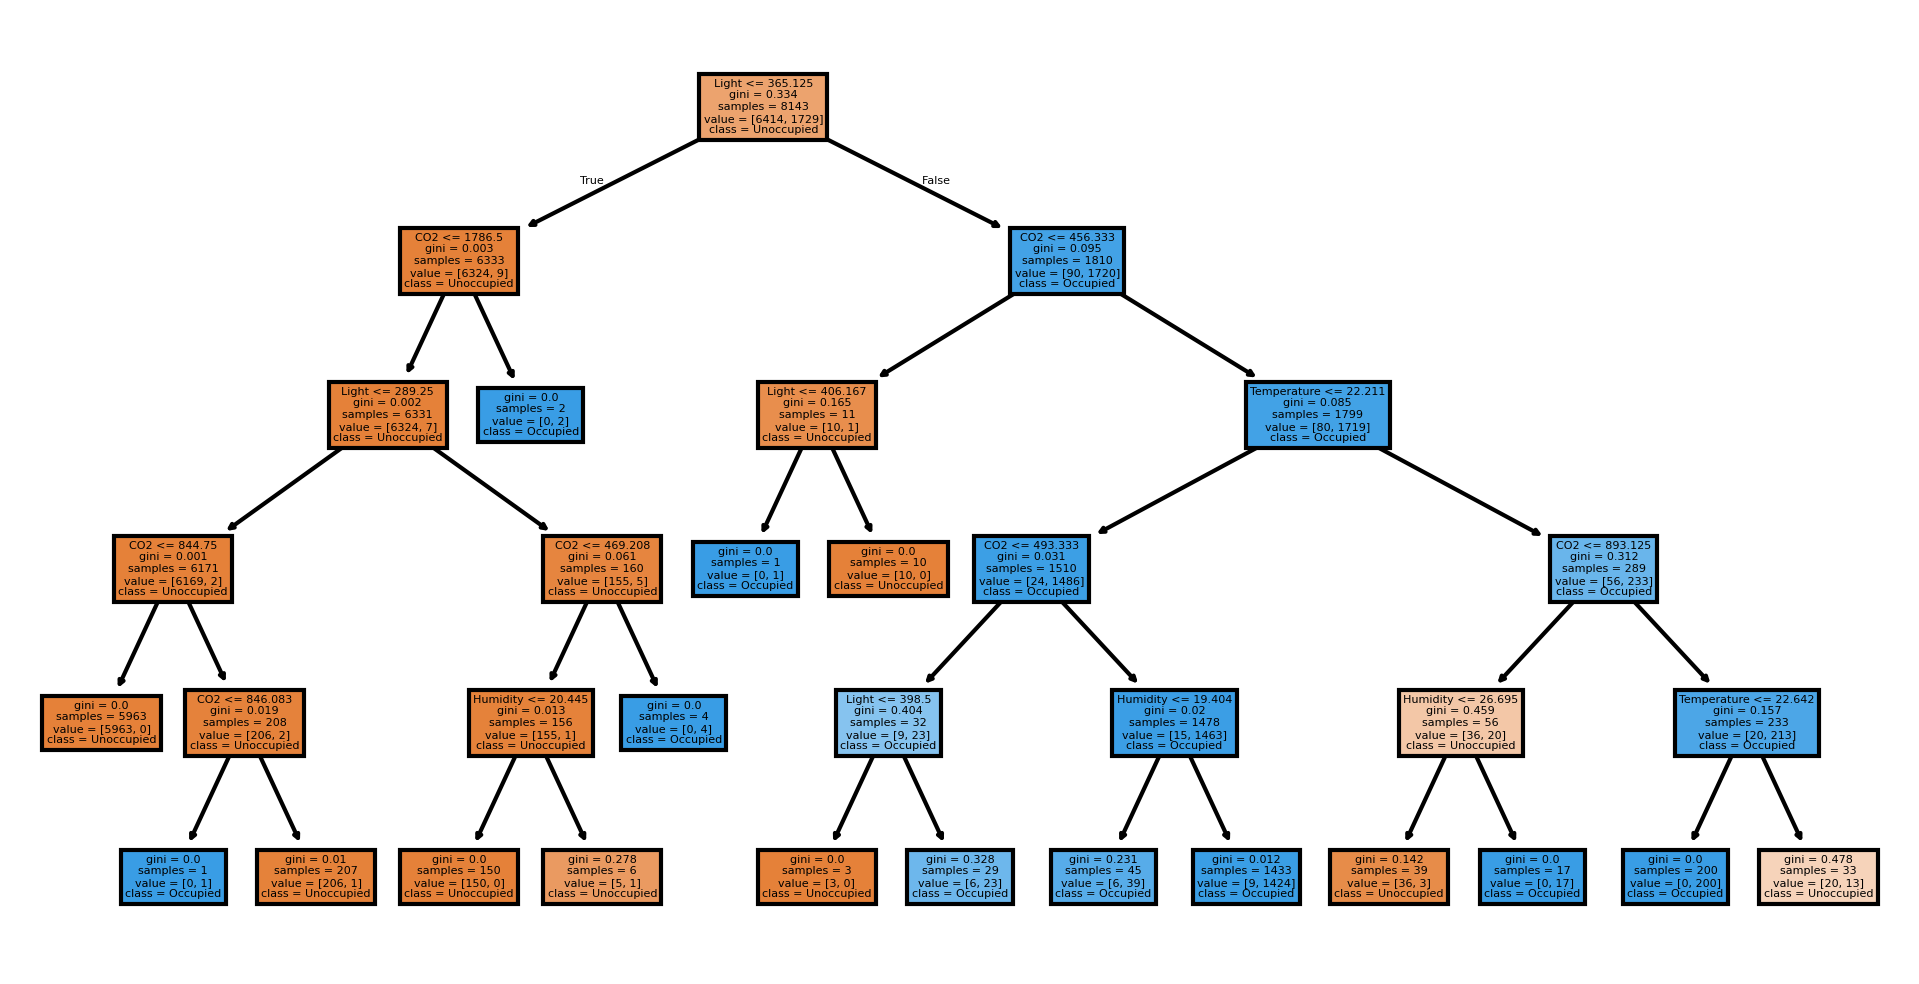

In [5]:
# Plot the tree
import matplotlib.pyplot as plt # Matplotlib is a plotting library used to build the trees
from sklearn.tree import plot_tree # The plotting function for making decision tree visuals

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,4), dpi=300)
tree = plot_tree(clf, # Which model to plot
            feature_names = ['Temperature','Humidity','Light','CO2','HumidityRatio'], # Variable names (in order!)
            class_names=['Unoccupied', 'Occupied'], # Class names (value for 0 then value for 1)
            filled = True) # Provides the color-filled cells

We simply import the required plotting library (`matplotlib`, which we do not cover in detail in this course, though many tutorials can easily be found online), and the tree plotting function `plot_tree` from `sklearn.tree`. We can provide detailed variable names so that our tree is readable, as well as class labels, so that our tree can be read by a new user or any other interested party.

## Testing Performance (the simple version)

Now, we will use the `.predict()` method to determine how well our tree performs. First, though, let's retrain our tree without using all of our observations. This way, we can use the remaining observations to test our model's performance:

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Randomly sample our data --> 70% to train with, and 30% for testing
x, xt, y, yt = train_test_split(x, y, test_size=0.3)

# Create the model and fit it using the train data
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x, y)

# Test our model using the testing data
pred = clf.predict(xt)
acc = accuracy_score(yt, pred)

print("Model accuracy is {}%.".format(acc*100))

Model accuracy is 99.22226770364307%.


The `train_test_split()` function takes our `x` and `y` data, and samples them together to create `x`, `xt`, `y`, `yt`, which are training data (x), testing data (x), training data (y), and testing data (y), respectively. The `test_size` parameter allows us to specify how much data we would like to withold from our training data. In the example above, we keep 30% of observations to test our model.

We also import the `accuracy_score` function, which gives us a rudimentary assessment of our model's ability to distinguish between success (1) and failure (0). It is measured as the number of correct predictions / total number of predictions. We use this function to compare the predictions that our model made (stored in the variable `pred`) and the true outcomes associated with our testing data, `yt`.

At this point, we now know how to sample our data, create and train our model, and test our model's ability to predict new observations! We are ready to use decision trees to model the real world!

**Reading Reflection**:

Below is a Decision Tree (CART) model that predicts the likelihood of students to pass or fail using the [Portuguese student data](https://github.com/dustywhite7/pythonMikkeli/raw/master/exampleData/passFailTrain.csv) from last class. 
 
The outcome of interest is stored in the variable `G3` (this should be your `y` variable). All other variables are included in the `x` array (remember that the decision tree algorithm will pick the best variables for you!). 

All necessary code for the model to be trained and tested is presented for you. Run the model, and then write an explanation **for a lay-person** of how this decision tree makes a decision if it is given a new student record. Submit your response in Canvas.

In [7]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

data = pd.read_csv("https://github.com/dustywhite7/pythonMikkeli/raw/master/exampleData/passFailTrain.csv")

y = data['G3']
x = data.drop('G3', axis=1)

studentTree = DecisionTreeClassifier(max_depth=10, min_samples_leaf = 10)
studentTree.fit(x, y)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


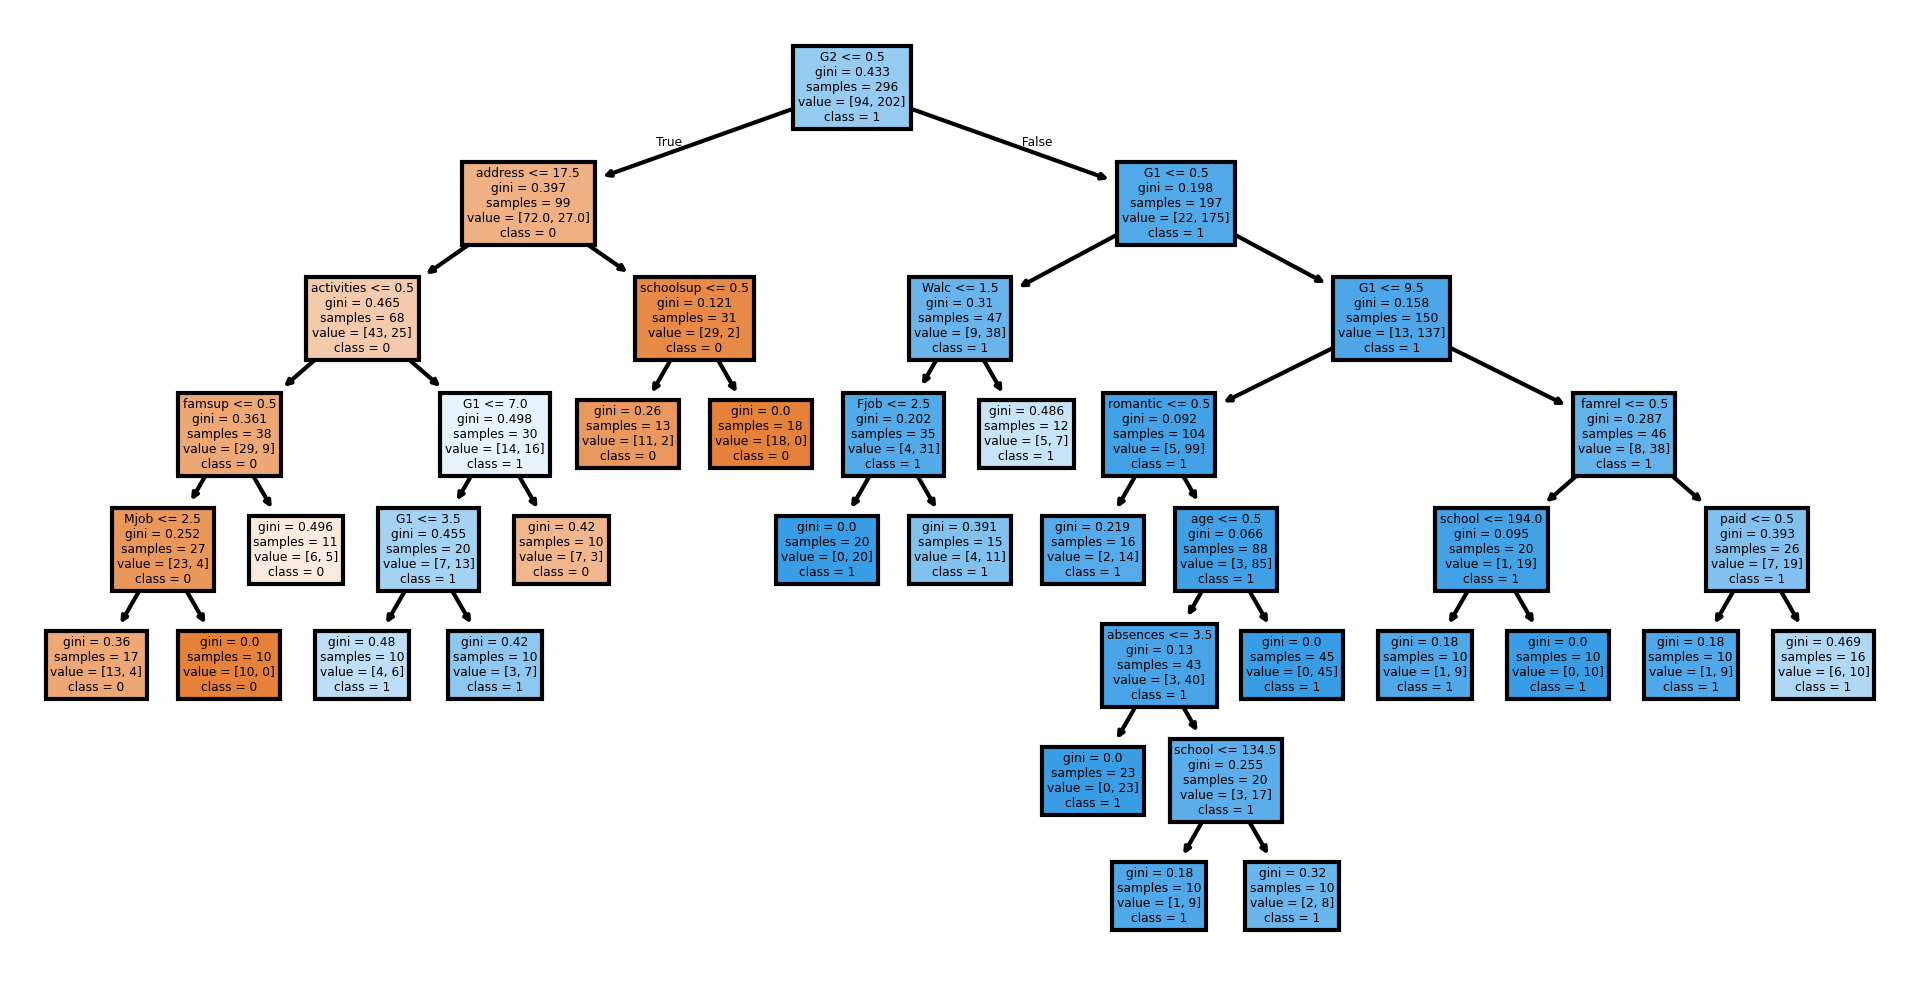

In [8]:
import matplotlib.pyplot as plt # Matplotlib is a plotting library used to build the trees
from sklearn.tree import plot_tree # The plotting function for making decision tree visuals

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,4), dpi=300)
tree = plot_tree(studentTree, # Which model to plot
            feature_names = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason','guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2'], # Variable names (in order!)
            class_names=['0', '1'], # Class names (value for 0 then value for 1)
            filled = True) # Provides the color-filled cells

If the data was given a new record to run through the decision tree, 